In [3]:
import pandas as pd
# ... YOUR CODE FOR TASK 1 ...

# Define file containing dataset
runkeeper_file = 'datasets/cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters 
df_activities =pd.read_csv(runkeeper_file,parse_dates=['Date'],index_col='Date')
#df_activities.head()
# First look at exported data: select sample of 3 random rows 
#display(...)
df_activities.sample(3)

# Print DataFrame summary
# ... YOUR CODE FOR TASK 1 ...
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
Activity Id                 508 non-null object
Type                        508 non-null object
Route Name                  1 non-null object
Distance (km)               508 non-null float64
Duration                    508 non-null object
Average Pace                508 non-null object
Average Speed (km/h)        508 non-null float64
Calories Burned             508 non-null float64
Climb (m)                   508 non-null int64
Average Heart Rate (bpm)    294 non-null float64
Friend's Tagged             0 non-null float64
Notes                       231 non-null object
GPX File                    504 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 55.6+ KB


## 2. Data preprocessing
<p>Lucky for us, the column names Runkeeper provides are informative, and we don't need to rename any columns.</p>
<p>But, we do notice missing values using the <code>info()</code> method. What are the reasons for these missing values? It depends. Some heart rate information is missing because I didn't always use a cardio sensor. In the case of the <code>Notes</code> column, it is an optional field that I sometimes left blank. Also, I only used the <code>Route Name</code> column once, and never used the <code>Friend's Tagged</code> column.</p>
<p>We'll fill in missing values in the heart rate column to avoid misleading results later, but right now, our first data preprocessing steps will be to:</p>
<ul>
<li>Remove columns not useful for our analysis.</li>
<li>Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.</li>
<li>Count missing values.</li>
</ul>

In [4]:
# Define list of columns to be deleted
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Delete unnecessary columns
# ... YOUR CODE FOR TASK 2 ...
df_activities= df_activities.drop(columns = cols_to_drop)

# Count types of training activities
print(df_activities["Type"].value_counts())

# Rename 'Other' type to 'Unicycling'
df_activities['Type'] = df_activities['Type'].str.replace("Other","Unicycling")

# Count missing values for each column
# ... YOUR CODE FOR TASK 2 ...
df_activities.isnull().sum()

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64


Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

## 3. Dealing with missing values
<p>As we can see from the last output, there are 214 missing entries for my average heart rate.</p>
<p>We can't go back in time to get those data, but we can fill in the missing values with an average value. This process is called <em>mean imputation</em>. When imputing the mean to fill in missing data, we need to consider that the average heart rate varies for different activities (e.g., walking vs. running). We'll filter the DataFrames by activity type (<code>Type</code>) and calculate each activity's mean heart rate, then fill in the missing values with those means.</p>

In [6]:
# Calculate sample means for heart rate for each training activity type 
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()
#df_unic = df_activities[df_activities['Type'] == 'Unicycling'].copy()

# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle["Average Heart Rate (bpm)"].fillna(int(avg_hr_cycle), inplace= True)
# ... YOUR CODE FOR TASK 3 ...

# Count missing values for each column in running data
# ... YOUR CODE FOR TASK 3 ...
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

## 4. Plot running data
<p>Now we can create our first plot! As we found earlier, most of the activities in my data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. So for now, let's focus on plotting the different running metrics.</p>
<p>An excellent first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, <code>Date</code>, is shared among all subplots.</p>

In [8]:
df_run

Type  Distance (km) Duration Average Pace  \
Date                                                                
2018-11-11 14:05:12  Running          10.44    58:40         5:37   
2018-11-09 15:02:35  Running          12.84  1:14:12         5:47   
2018-11-04 16:05:00  Running          13.01  1:15:16         5:47   
2018-11-01 14:03:58  Running          12.98  1:14:25         5:44   
2018-10-27 17:01:36  Running          13.02  1:12:50         5:36   
2018-10-19 17:52:32  Running          10.29    59:18         5:46   
2018-10-14 17:28:56  Running          12.93  1:10:16         5:26   
2018-10-12 17:41:58  Running          12.31  1:09:26         5:38   
2018-09-30 16:52:34  Running          12.97  1:13:56         5:42   
2018-08-22 18:25:22  Running           4.38    33:55         7:45   
2018-08-12 17:37:17  Running          22.09  2:13:22         6:02   
2018-08-08 18:44:59  Running          15.27  1:19:37         5:13   
2018-08-05 10:17:10  Running          18.70  1:49:19         5:51   
2018-08-01 18:20:26  Running          18.20  1:43:05         5:40   
2018-07-30 18:18:47  Running          17.87  1:44:00         5:49   
2018-07-27 11:43:03  Running          12.71  1:14:51         5:53   
2018-07-20 08:01:51  Running          11.01    59:18         5:23   
2018-07-18 08:08:39  Running          11.04    55:41         5:03   
2018-07-13 17:43:20  Running          17.96  1:41:36         5:40   
2018-07-07 16:02:30  Running          17.85  1:37:40         5:28   
2018-07-03 18:00:05  Running          18.75  1:41:30         5:25   
2018-06-28 12:24:25  Running          17.95  1:36:59         5:24   
2018-06-25 18:11:12  Running          18.72  1:39:27         5:19   
2018-06-21 18:03:18  Running          14.38  1:15:59         5:17   
2018-06-18 18:17:49  Running          11.63  1:02:52         5:24   
2018-06-16 17:29:00  Running          14.95  1:19:03         5:17   
2018-06-13 18:50:49  Running          12.75  1:07:30         5:18   
2018-06-11 18:23:11  Running          15.74  1:22:58         5:16   
2018-06-06 18:44:29  Running          12.78  1:07:56         5:19   
2018-06-03 17:21:51  Running          17.58  1:33:29         5:19   
...                      ...            ...      ...          ...   
2013-02-22 19:23:38  Running           6.32    35:58         5:41   
2013-02-20 18:43:56  Running           9.59    52:35         5:29   
2013-02-15 18:46:00  Running           9.48    50:29         5:20   
2013-02-06 18:58:31  Running           3.07     8:54         2:54   
2013-01-23 18:38:29  Running           8.65    50:13         5:48   
2013-01-19 09:58:50  Running           3.39    15:56         4:42   
2013-01-15 18:40:08  Running           6.72    32:42         4:52   
2013-01-12 08:39:55  Running           3.09    20:07         6:31   
2013-01-02 18:35:11  Running           5.47    31:24         5:45   
2012-12-22 08:29:13  Running           3.05    18:44         6:09   
2012-12-15 09:43:53  Running           3.14    20:08         6:25   
2012-12-08 08:37:38  Running           3.21    18:50         5:53   
2012-12-04 18:52:39  Running           6.63    32:05         4:50   
2012-12-01 08:21:18  Running           3.31    18:07         5:28   
2012-11-28 18:58:02  Running           6.28    37:29         5:58   
2012-11-24 08:57:47  Running           2.65    14:07         5:20   
2012-11-18 09:51:18  Running           3.18    17:13         5:25   
2012-11-10 08:37:49  Running           2.85    16:52         5:55   
2012-11-07 18:54:35  Running           4.79    27:16         5:42   
2012-10-23 18:43:56  Running           5.20    29:26         5:40   
2012-10-20 08:37:33  Running           3.18    19:28         6:07   
2012-10-18 18:39:07  Running           3.70    19:17         5:13   
2012-10-16 20:27:31  Running           1.28    13:17        10:24   
2012-09-22 08:56:08  Running           3.16    16:26         5:13   
2012-09-15 08:05:15  Running           3.11    16:58         5:28   
2012-09-08 08:35:02  R

In [9]:
df_run["2018" : "2013"].shape

(438, 7)

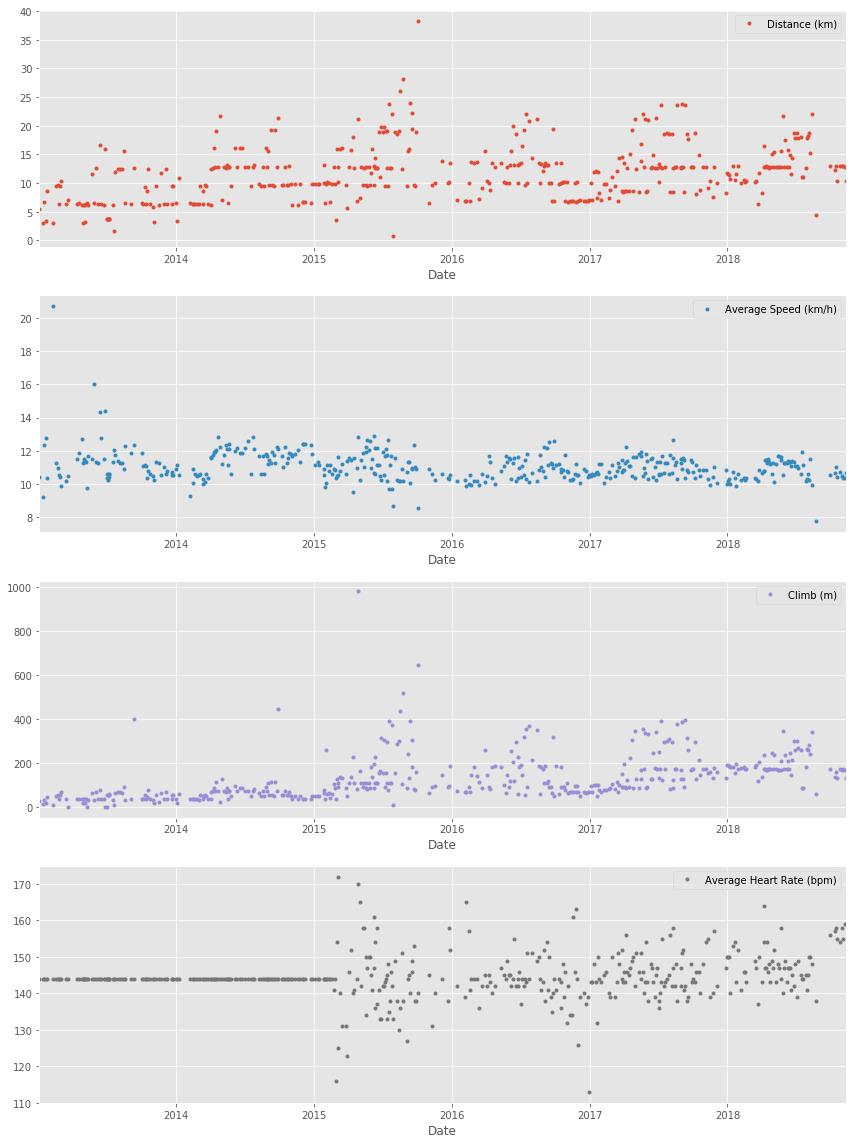

In [10]:
%matplotlib inline

# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)
#2013-01-01 : 2018-12-31
# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run['2018' : '2013']

# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )

# Show plot
# ... YOUR CODE FOR TASK 4 ...
plt.show()

## 5. Running statistics
<p>No doubt, running helps people stay mentally and physically healthy and productive at any age. And it is great fun! When runners talk to each other about their hobby, we not only discuss our results, but we also discuss different training strategies. </p>
<p>You'll know you're with a group of runners if you commonly hear questions like:</p>
<ul>
<li>What is your average distance?</li>
<li>How fast do you run?</li>
<li>Do you measure your heart rate?</li>
<li>How often do you train?</li>
</ul>
<p>Let's find the answers to these questions in my data. If you look back at plots in Task 4, you can see the answer to, <em>Do you measure your heart rate?</em> Before 2015: no. To look at the averages, let's only use the data from 2015 through 2018.</p>
<p>In pandas, the <code>resample()</code> method is similar to the <code>groupby()</code> method - with <code>resample()</code> you group by a specific time span. We'll use <code>resample()</code> to group the time series data by a sampling period and apply several methods to each sampling period. In our case, we'll resample annually and weekly.</p>

In [12]:
df_run['Distance (km)'].resample('W').count().mean()

1.4123076923076923

In [13]:
# Prepare running data for the last 4 years
runs_subset_2015_2018 = df_run["2018":"2015"]

# Calculate annual statistics
print('How my average run looks in last 4 years:')
display(runs_subset_2015_2018.resample('A').mean())

# Calculate weekly statistics
print('Weekly averages of last 4 years:')
display(runs_subset_2015_2018.resample('W').mean())

# Mean weekly counts
weekly_counts_average = df_run["Distance (km)"].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_average)

How my average run looks in last 4 years:


Distance (km)  Average Speed (km/h)   Climb (m)  \
Date                                                          
2015-12-31      13.602805             10.998902  160.170732   
2016-12-31      11.411667             10.837778  133.194444   
2017-12-31      12.935176             10.959059  169.376471   
2018-12-31      13.339063             10.777969  191.218750   

            Average Heart Rate (bpm)  
Date                                  
2015-12-31                143.353659  
2016-12-31                143.388889  
2017-12-31                145.247059  
2018-12-31                148.125000

Weekly averages of last 4 years:


Distance (km)  Average Speed (km/h)   Climb (m)  \
Date                                                          
2015-01-04       9.780000             11.120000   51.000000   
2015-01-11            NaN                   NaN         NaN   
2015-01-18       9.780000             11.230000   51.000000   
2015-01-25            NaN                   NaN         NaN   
2015-02-01       9.893333             10.423333   58.000000   
2015-02-08      10.070000             10.600000  159.000000   
2015-02-15       8.345000             10.945000   51.500000   
2015-02-22       9.860000             10.580000   60.000000   
2015-03-01       8.706667             10.686667   75.000000   
2015-03-08      13.016667             10.870000  108.000000   
2015-03-15      15.910000             10.800000  136.000000   
2015-03-22      16.150000             11.190000  133.000000   
2015-03-29       9.730000             10.580000   84.000000   
2015-04-05       9.280000             11.475000   78.000000   
2015-04-12      15.790000             11.460000  135.000000   
2015-04-19      15.370000             10.550000  169.000000   
2015-04-26      13.995000             11.905000  531.500000   
2015-05-03       7.390000             10.270000  162.000000   
2015-05-10      12.830000             11.460000  107.000000   
2015-05-17      10.653333             11.603333   94.666667   
2015-05-24      11.135000             12.430000   95.500000   
2015-05-31      11.265000             12.320000   96.000000   
2015-06-07      13.610000             11.053333  169.333333   
2015-06-14      12.193333             11.886667  139.333333   
2015-06-21      12.625000             11.675000  108.000000   
2015-06-28      16.596667             10.633333  210.333333   
2015-07-05      19.265000             11.235000  228.500000   
2015-07-12      15.870000             11.343333  179.666667   
2015-07-19      15.370000             11.356667  192.000000   
2015-07-26      15.813333             10.846667  196.333333   
...                   ...                   ...         ...   
2018-04-22      12.770000             11.425000  171.500000   
2018-04-29      13.920000             10.890000  208.000000   
2018-05-06      14.075000             10.710000  204.000000   
2018-05-13      12.760000             11.180000  170.000000   
2018-05-20      12.795000             11.660000  167.500000   
2018-05-27      16.703333             11.210000  239.666667   
2018-06-03      15.195000             11.275000  203.500000   
2018-06-10      12.780000             11.290000  170.000000   
2018-06-17      14.480000             11.356667  208.333333   
2018-06-24      13.005000             11.230000  178.000000   
2018-07-01      18.335000             11.200000  280.500000   
2018-07-08      18.300000             11.025000  283.000000   
2018-07-15      17.960000             10.600000  258.000000   
2018-07-22      11.025000             11.520000   86.000000   
2018-07-29      12.710000             10.190000  180.000000   
2018-08-05      18.256667             10.386667  266.666667   
2018-08-12      18.680000             10.725000  291.500000   
2018-08-19            NaN                   NaN         NaN   
2018-08-26       4.380000              7.750000   60.000000   
2018-09-02            NaN                   NaN         NaN   
2018-09-09            NaN                   NaN         NaN   
2018-09-16            NaN                   NaN         NaN   
2018-09-23            NaN                   NaN         NaN   
2018-09-30      12.970000             10.520000  171.000000   
2018-10-07            NaN                   NaN         NaN   
2018-10-14      12.620000             10.840000  146.500000   
2018-10-21      10.290000             10.410000  133.000000   
2018-10-28      13.020000             10.730000  170.000000   
2018-11-04      12.995000             10.420000  170.000000   
2018-11-11      11.640000             10.535000  149.000000   

            Average Heart Rate (bpm)  
Dat

How many trainings per week I had on average: 1.4123076923076923


## 6. Visualization with averages
<p>Let's plot the long term averages of my distance run and my heart rate with their raw data to visually compare the averages to each training session. Again, we'll use the data from 2015 through 2018.</p>
<p>In this task, we will use <code>matplotlib</code> functionality for plot creation and customization.</p>

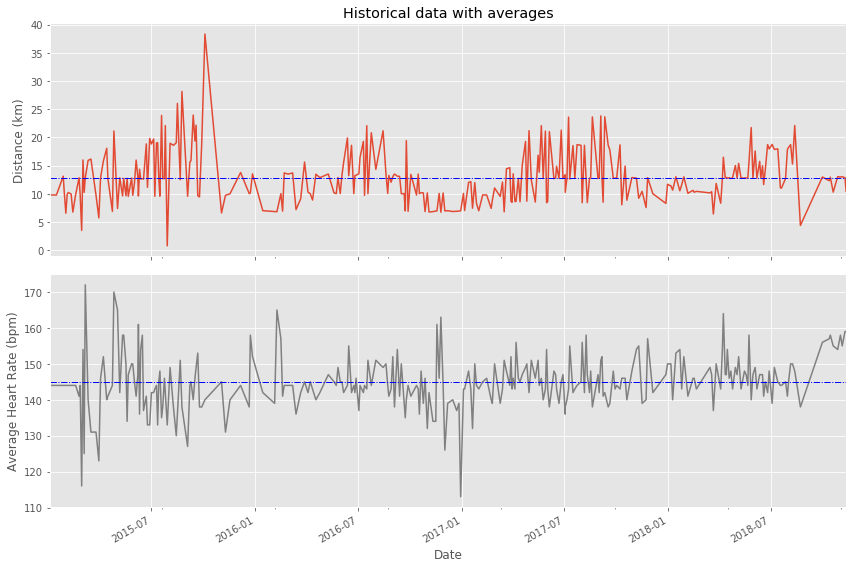

In [15]:
# Prepare data
runs_subset_2015_2018 = df_run['2018':'2015']
runs_distance = runs_subset_2015_2018["Distance (km)"]
runs_hr = runs_subset_2015_2018["Average Heart Rate (bpm)"]

# Create plot
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(12,8))

# Plot and customize first subplot
# ... YOUR CODE FOR TASK 6 ...
runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(),color="blue",linewidth=1,linestyle="-.")
# ... YOUR CODE FOR TASK 6 ...

# Show plot
plt.show()

## 7. Did I reach my goals?
<p>To motivate myself to run regularly, I set a target goal of running 1000 km per year. Let's visualize my annual running distance (km) from 2013 through 2018 to see if I reached my goal each year. Only stars in the green region indicate success.</p>

In [17]:
df_run.head()

Type  Distance (km) Duration Average Pace  \
Date                                                                
2018-11-11 14:05:12  Running          10.44    58:40         5:37   
2018-11-09 15:02:35  Running          12.84  1:14:12         5:47   
2018-11-04 16:05:00  Running          13.01  1:15:16         5:47   
2018-11-01 14:03:58  Running          12.98  1:14:25         5:44   
2018-10-27 17:01:36  Running          13.02  1:12:50         5:36   

                     Average Speed (km/h)  Climb (m)  Average Heart Rate (bpm)  
Date                                                                            
2018-11-11 14:05:12                 10.68        130                     159.0  
2018-11-09 15:02:35                 10.39        168                     159.0  
2018-11-04 16:05:00                 10.37        171                     155.0  
2018-11-01 14:03:58                 10.47        169                     158.0  
2018-10-27 17:01:36                 10.73        170                     154.0

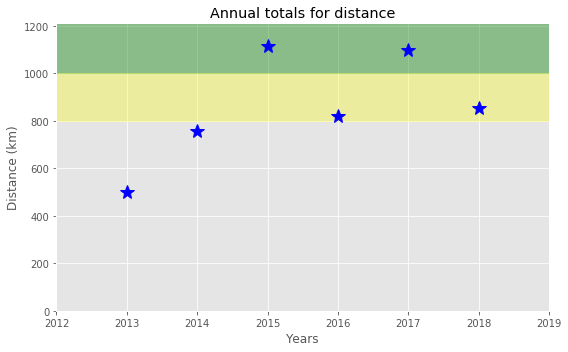

In [18]:
# Prepare data
df_run_dist_annual = df_run["2018":"2013"]["Distance (km)"].resample("A").sum()

# Create plot
fig = plt.figure(figsize=(8,5))

# Plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
# ... YOUR CODE FOR TASK 7 ...

# Show plot
# ... YOUR CODE FOR TASK 7 ...
plt.show()

In [19]:
df_run["2018":"2013"]["Distance (km)"].resample("A").sum()

Date
2013-12-31     498.25
2014-12-31     755.76
2015-12-31    1115.43
2016-12-31     821.64
2017-12-31    1099.49
2018-12-31     853.70
Freq: A-DEC, Name: Distance (km), dtype: float64

## 8. Am I progressing?
<p>Let's dive a little deeper into the data to answer a tricky question: am I progressing in terms of my running skills? </p>
<p>To answer this question, we'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.</p>
<p>We are going to use <code>statsmodels</code> library to decompose the weekly trend.</p>

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


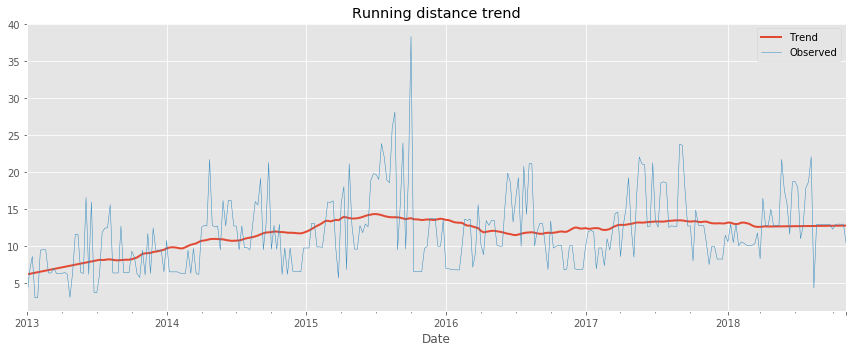

In [21]:
# Import required library
# ... YOUR CODE FOR TASK 8 ...
import statsmodels.api as sm
# Prepare data
df_run_dist_wkly = df_run['2018':'2013']["Distance (km)"].resample('W').bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, freq=52)

# Create plot
fig = plt.figure(figsize=(12,5))

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()

## 9. Training intensity
<p>Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.</p>
<p>We'll create a distribution plot of my heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones. </p>

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


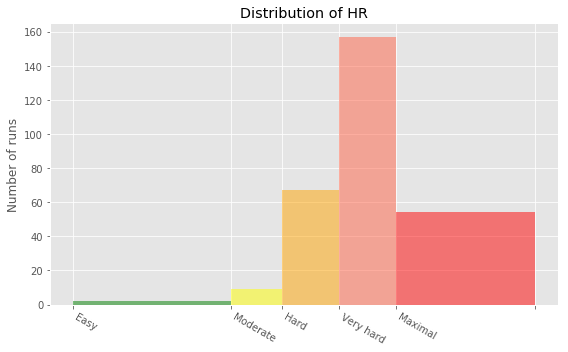

In [23]:
# Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]

zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run['2018':'2015-03']["Average Heart Rate (bpm)"]

# Create plot
fig, ax = plt.subplots(figsize=(8,5))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
# ... YOUR CODE FOR TASK 9 ...
ax.set_xticklabels(labels=zone_names,rotation=-30,ha='left')
# Show plot
# ... YOUR CODE FOR TASK 8 ...
plt.show()

## 10. Detailed summary report
<p>With all this data cleaning, analysis, and visualization, let's create detailed summary tables of my training. </p>
<p>To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.</p>

In [25]:
# Concatenating three DataFrames
df_run_walk_cycle = df_run.append(df_walk).append(df_cycle).sort_index(ascending = False)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby("Type")[dist_climb_cols].sum()
print('Totals for different training types:')
display(df_totals)

# Calculating summary statistics for each type of activities 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
# ... YOUR CODE FOR TASK 10 ...
df_summary.stack()

Totals for different training types:


Distance (km)  Climb (m)
Type                             
Cycling         680.58       6976
Running        5224.50      57278
Walking          33.45        349

Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    459.000000     459.000000
        max               20.720000    982.000000      38.320000
        mean              11.056296    124.788671      11.382353
        min                5.770000      0.000000       0.760000
        std                0.953273    103.382177       4.937853
        total                   NaN  57278.000000    5224.500000
Walking 25%                5.555000      7.000000       1.385000
        50%                5.970000     10.000000       1.485000
        75%                6.512500     15.500000       1.787500
        count             18.000000     18.000000      18.000000
        max                6.910000    112.000000       4.290000
        mean               5.549444     19.388889       1.858333
        min                1.040000      5.000000       1.220000
        std                1.459309     27.110100       0.880055
        total                   NaN    349.000000      33.450000

## 11. Fun facts
<p>To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise.</p>
<p>These data (my running history) represent 6 years, 2 months and 21 days. And I remember how many running shoes I went through–7.</p>
<pre><code>FUN FACTS
- Average distance: 11.38 km
- Longest distance: 38.32 km
- Highest climb: 982 m
- Total climb: 57,278 m
- Total number of km run: 5,224 km
- Total runs: 459
- Number of running shoes gone through: 7 pairs
</code></pre>
<p>The story of Forrest Gump is well known–the man, who for no particular reason decided to go for a "little run." His epic run duration was 3 years, 2 months and 14 days (1169 days). In the picture you can see Forrest’s route of 24,700 km.  </p>
<pre><code>FORREST RUN FACTS
- Average distance: 21.13 km
- Total number of km run: 24,700 km
- Total runs: 1169
- Number of running shoes gone through: ...
</code></pre>
<p>Assuming Forest and I go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/Forrest_Gump_running_route.png" alt="Forrest's route" title="Little run of Forrest Gump"></p>

In [27]:
# Count average shoes per lifetime (as km per pair) using our fun facts
average_shoes_lifetime = 5224/7

# Count number of shoes for Forrest's run distance
shoes_for_forrest_run = 24700/average_shoes_lifetime

print('Forrest Gump would need {} pairs of shoes!'.format(shoes_for_forrest_run))

Forrest Gump would need 33.09724349157733 pairs of shoes!


## 1. Obtain and review raw data
<p>One day, my old running friend and I were chatting about our running styles, training habits, and achievements, when I suddenly realized that I could take an in-depth analytical look at my training. I have been using a popular GPS fitness tracker called <a href="https://runkeeper.com/">Runkeeper</a> for years and decided it was time to analyze my running data to see how I was doing.</p>
<p>Since 2012, I've been using the Runkeeper app, and it's great. One key feature: its excellent data export. Anyone who has a smartphone can download the app and analyze their data like we will in this notebook.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/runner_in_blue.jpg" alt="Runner in blue" title="Explore world, explore your data!"></p>
<p>After logging your run, the first step is to export the data from Runkeeper (which I've done already). Then import the data and start exploring to find potential problems. After that, create data cleaning strategies to fix the issues. Finally, analyze and visualize the clean time-series data.</p>
<p>I exported seven years worth of my training data, from 2012 through 2018. The data is a CSV file where each row is a single training activity. Let's load and inspect it.</p>